In [90]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('./../data/SteelPlant.csv')
df.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [4]:
df['Other_Faults'].value_counts()

Other_Faults
0    12661
1     6558
Name: count, dtype: int64

In [5]:
# unbalcanced data

In [6]:
fault_types = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
df[fault_types].nunique()

Pastry          2
Z_Scratch       2
K_Scatch        2
Stains          2
Dirtiness       2
Bumps           2
Other_Faults    2
dtype: int64

In [7]:
df[fault_types].head(10)

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1
5,0,0,0,0,0,0,1
6,0,0,0,0,0,1,0
7,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0


In [8]:
df['Target'] = df[fault_types].idxmax(axis=1)

In [9]:
df

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,Target
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.0104,0.1417,0,0,0,1,0,0,0,Stains
1,1,808,816,728350,728372,433,20,54,44478,70,...,-0.2997,0.9491,0,0,0,0,0,0,1,Other_Faults
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0944,1.0000,0,0,1,0,0,0,0,K_Scatch
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,-0.0402,0.4025,0,0,1,0,0,0,0,K_Scatch
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,-0.2455,0.9998,0,0,0,0,0,0,1,Other_Faults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,...,0.0044,0.2901,0,0,0,1,0,0,0,Stains
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,...,-0.0989,0.5378,0,0,0,0,0,0,1,Other_Faults
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,...,-0.4283,0.9997,1,0,0,0,0,0,0,Pastry
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,...,-0.1162,0.3509,0,0,0,0,0,0,1,Other_Faults


- Pastry: Small patches or irregularities on the steel plate surface.
- Z_Scratch: Narrow scratches on the surface running parallel to the rolling direction.
- K_Scratch: Scratches similar to Z-scratch but perpendicular to the rolling direction.
- Stains: Discolored areas indicating contamination.
- Dirtiness: Presence of dirt or particulate matter on the surface.
- Bumps: Protruding areas on the surface of the steel plate.
- Other_Faults: A catch-all category for faults not classified elsewhere.

In [10]:
# Calculate the probability of each category
probabilities = df['Target'].value_counts(normalize=True)
probabilities

Target
Other_Faults    0.340288
Bumps           0.247724
K_Scatch        0.178521
Pastry          0.118841
Z_Scratch       0.059837
Stains          0.029554
Dirtiness       0.025235
Name: proportion, dtype: float64

In [11]:
# Calculate entropy using the formula
entropy = -np.sum(probabilities * np.log2(probabilities))
entropy

2.364097425566414

In [12]:
import numpy as np

fault_types = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
df['Target'] = df[fault_types].idxmax(axis=1)

# Function to calculate entropy
def entropy_calc(y):
    p = y.value_counts(normalize=True).to_numpy()
    entropies = -p * np.log2(p)  # Using log base 2 for entropy calculation
    return round(np.sum(entropies), 2)

# Calculate root entropy
root_entropy = entropy_calc(df['Target'])
print(f"The root entropy is: {root_entropy}")

The root entropy is: 2.36


<Axes: xlabel='Target'>

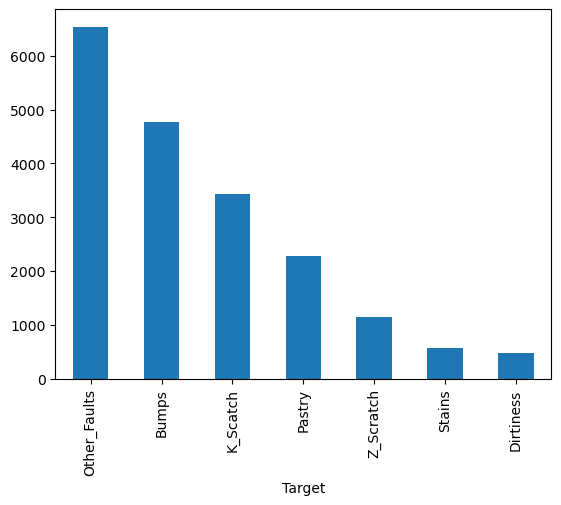

In [13]:
df['Target'].value_counts().plot(kind='bar')

In [14]:
X = df[['Pixels_Areas', 'SigmoidOfAreas']]
y = df.Target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape) 

(14414, 2)
(4805, 2)
(14414,)
(4805,)


In [17]:
from sklearn.tree import plot_tree

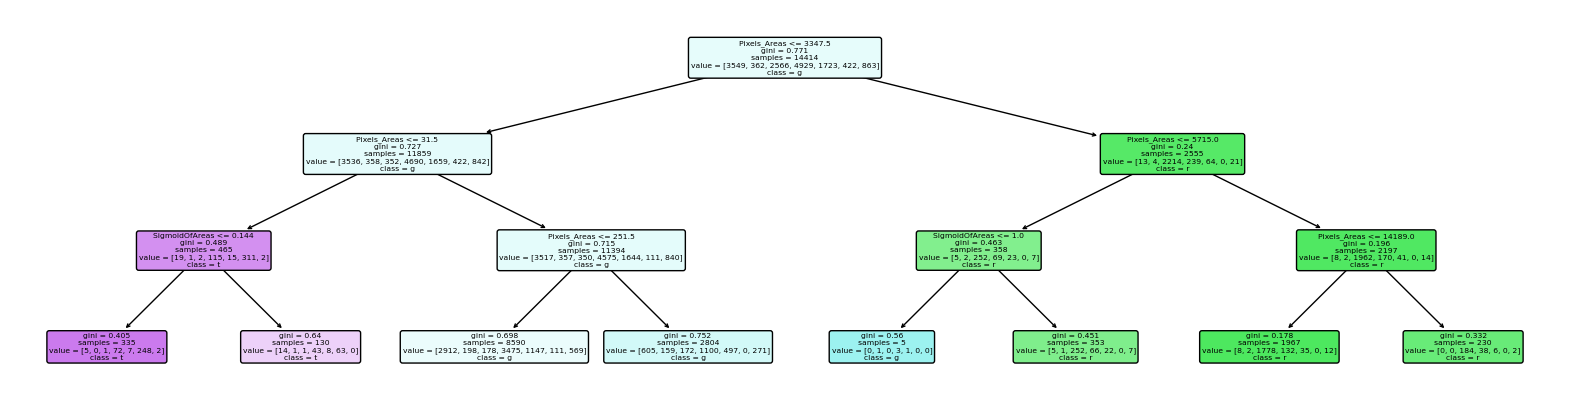

In [18]:
clf = DecisionTreeClassifier(max_depth=3, criterion='gini')
clf.fit(X_train, y_train) 
plt.figure(figsize=(20, 5))
tree.plot_tree(clf, feature_names=X.columns, class_names='Target', filled=True, rounded=True)
plt.show()

In [19]:
def gini_cal(p_p=1, p_y=1):    
    return np.round(1 - np.sum(np.array([p_p, p_y])**2), 2)

gini_cal()

-1

In [20]:
purple = 5 
yellow = 5 

In [21]:
n_samples = 10
p_p = 5/n_samples
p_y = 5/n_samples

p_gini = gini_cal( p_p = p_p, p_y = p_y)
p_gini

0.5

In [22]:
# left
n_samples = 4
p_p = 4/n_samples
p_y = 0/n_samples

left_gini = gini_cal( p_p = p_p, p_y = p_y)
left_gini

0.0

In [23]:
# right 

n_samples = 6
p_p = 1/n_samples
p_y = 5/n_samples

right_gini = gini_cal( p_p = p_p, p_y = p_y)
right_gini

0.28

In [24]:
wtGiniIndex = (left_gini  * 4/10) + (right_gini* 6/10)
wtGiniIndex

0.168

In [25]:
p_gini - wtGiniIndex

0.33199999999999996

In [26]:
## parent
n_samples = 5
p_c = 4/n_samples
p_r = 1/n_samples

p_gini = gini_cal( p_p = p_c, p_y = p_r)
p_gini

0.32

In [27]:
## left
n_samples = 2
p_c = 1/n_samples
p_r = 1/n_samples

left_gini = gini_cal( p_p = p_c, p_y = p_r)
left_gini

0.5

In [28]:
## left
n_samples = 3
p_c = 3/n_samples
p_r = 0/n_samples

right_gini = gini_cal( p_p = p_c, p_y = p_r)
right_gini

0.0

In [29]:
wtGiniIndex = (left_gini  * 2/5) + (right_gini* 3/5)
wtGiniIndex

0.2

### Q2. Most Misclassified DT

In [33]:
df = pd.read_csv('./../data/SteelPlant.csv')
df.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [35]:
fault_types = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

In [48]:
df['Target'] = df[fault_types].idxmax(axis=1)

In [50]:
df

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,Target
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.0104,0.1417,0,0,0,1,0,0,0,Stains
1,1,808,816,728350,728372,433,20,54,44478,70,...,-0.2997,0.9491,0,0,0,0,0,0,1,Other_Faults
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0944,1.0000,0,0,1,0,0,0,0,K_Scatch
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,-0.0402,0.4025,0,0,1,0,0,0,0,K_Scatch
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,-0.2455,0.9998,0,0,0,0,0,0,1,Other_Faults
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,...,0.0044,0.2901,0,0,0,1,0,0,0,Stains
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,...,-0.0989,0.5378,0,0,0,0,0,0,1,Other_Faults
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,...,-0.4283,0.9997,1,0,0,0,0,0,0,Pastry
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,...,-0.1162,0.3509,0,0,0,0,0,0,1,Other_Faults


In [52]:
df = df.drop(columns=fault_types)

In [72]:
X = df.loc[:, df.columns != 'Target']
y = df.loc[:, 'Target']

In [75]:
X.shape, y.shape

((19219, 28), (19219,))

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=42)

In [85]:
for val in [X_train, X_test, y_train, y_test]:
    print(val.shape)

(14414, 28)
(4805, 28)
(14414,)
(4805,)


In [91]:
# Train a decision tree classifier with class weights
clf = DecisionTreeClassifier(criterion = 'entropy',  class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

In [98]:
y_pred = clf.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

       Bumps       0.39      0.39      0.39      1178
   Dirtiness       0.18      0.14      0.16       133
    K_Scatch       0.83      0.83      0.83       853
Other_Faults       0.39      0.41      0.40      1622
      Pastry       0.21      0.22      0.22       583
      Stains       0.65      0.62      0.63       136
   Z_Scratch       0.44      0.40      0.42       300

    accuracy                           0.45      4805
   macro avg       0.44      0.43      0.44      4805
weighted avg       0.45      0.45      0.45      4805



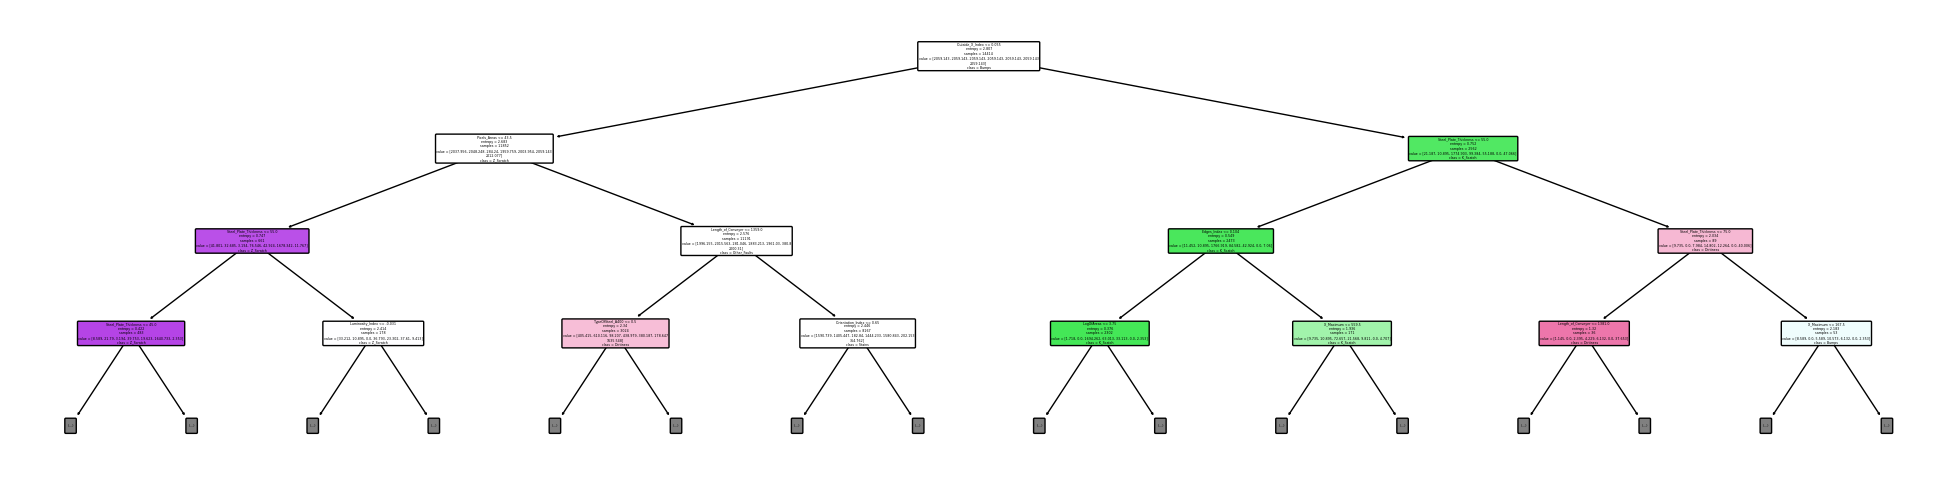

In [108]:
plt.figure(figsize=(25, 6))
tree.plot_tree(clf, feature_names=X.columns, class_names=df['Target'].unique(), filled=True, rounded=True, max_depth = 3)
plt.show()